In [2]:
import matplotlib.pyplot as plt
import numpy as np

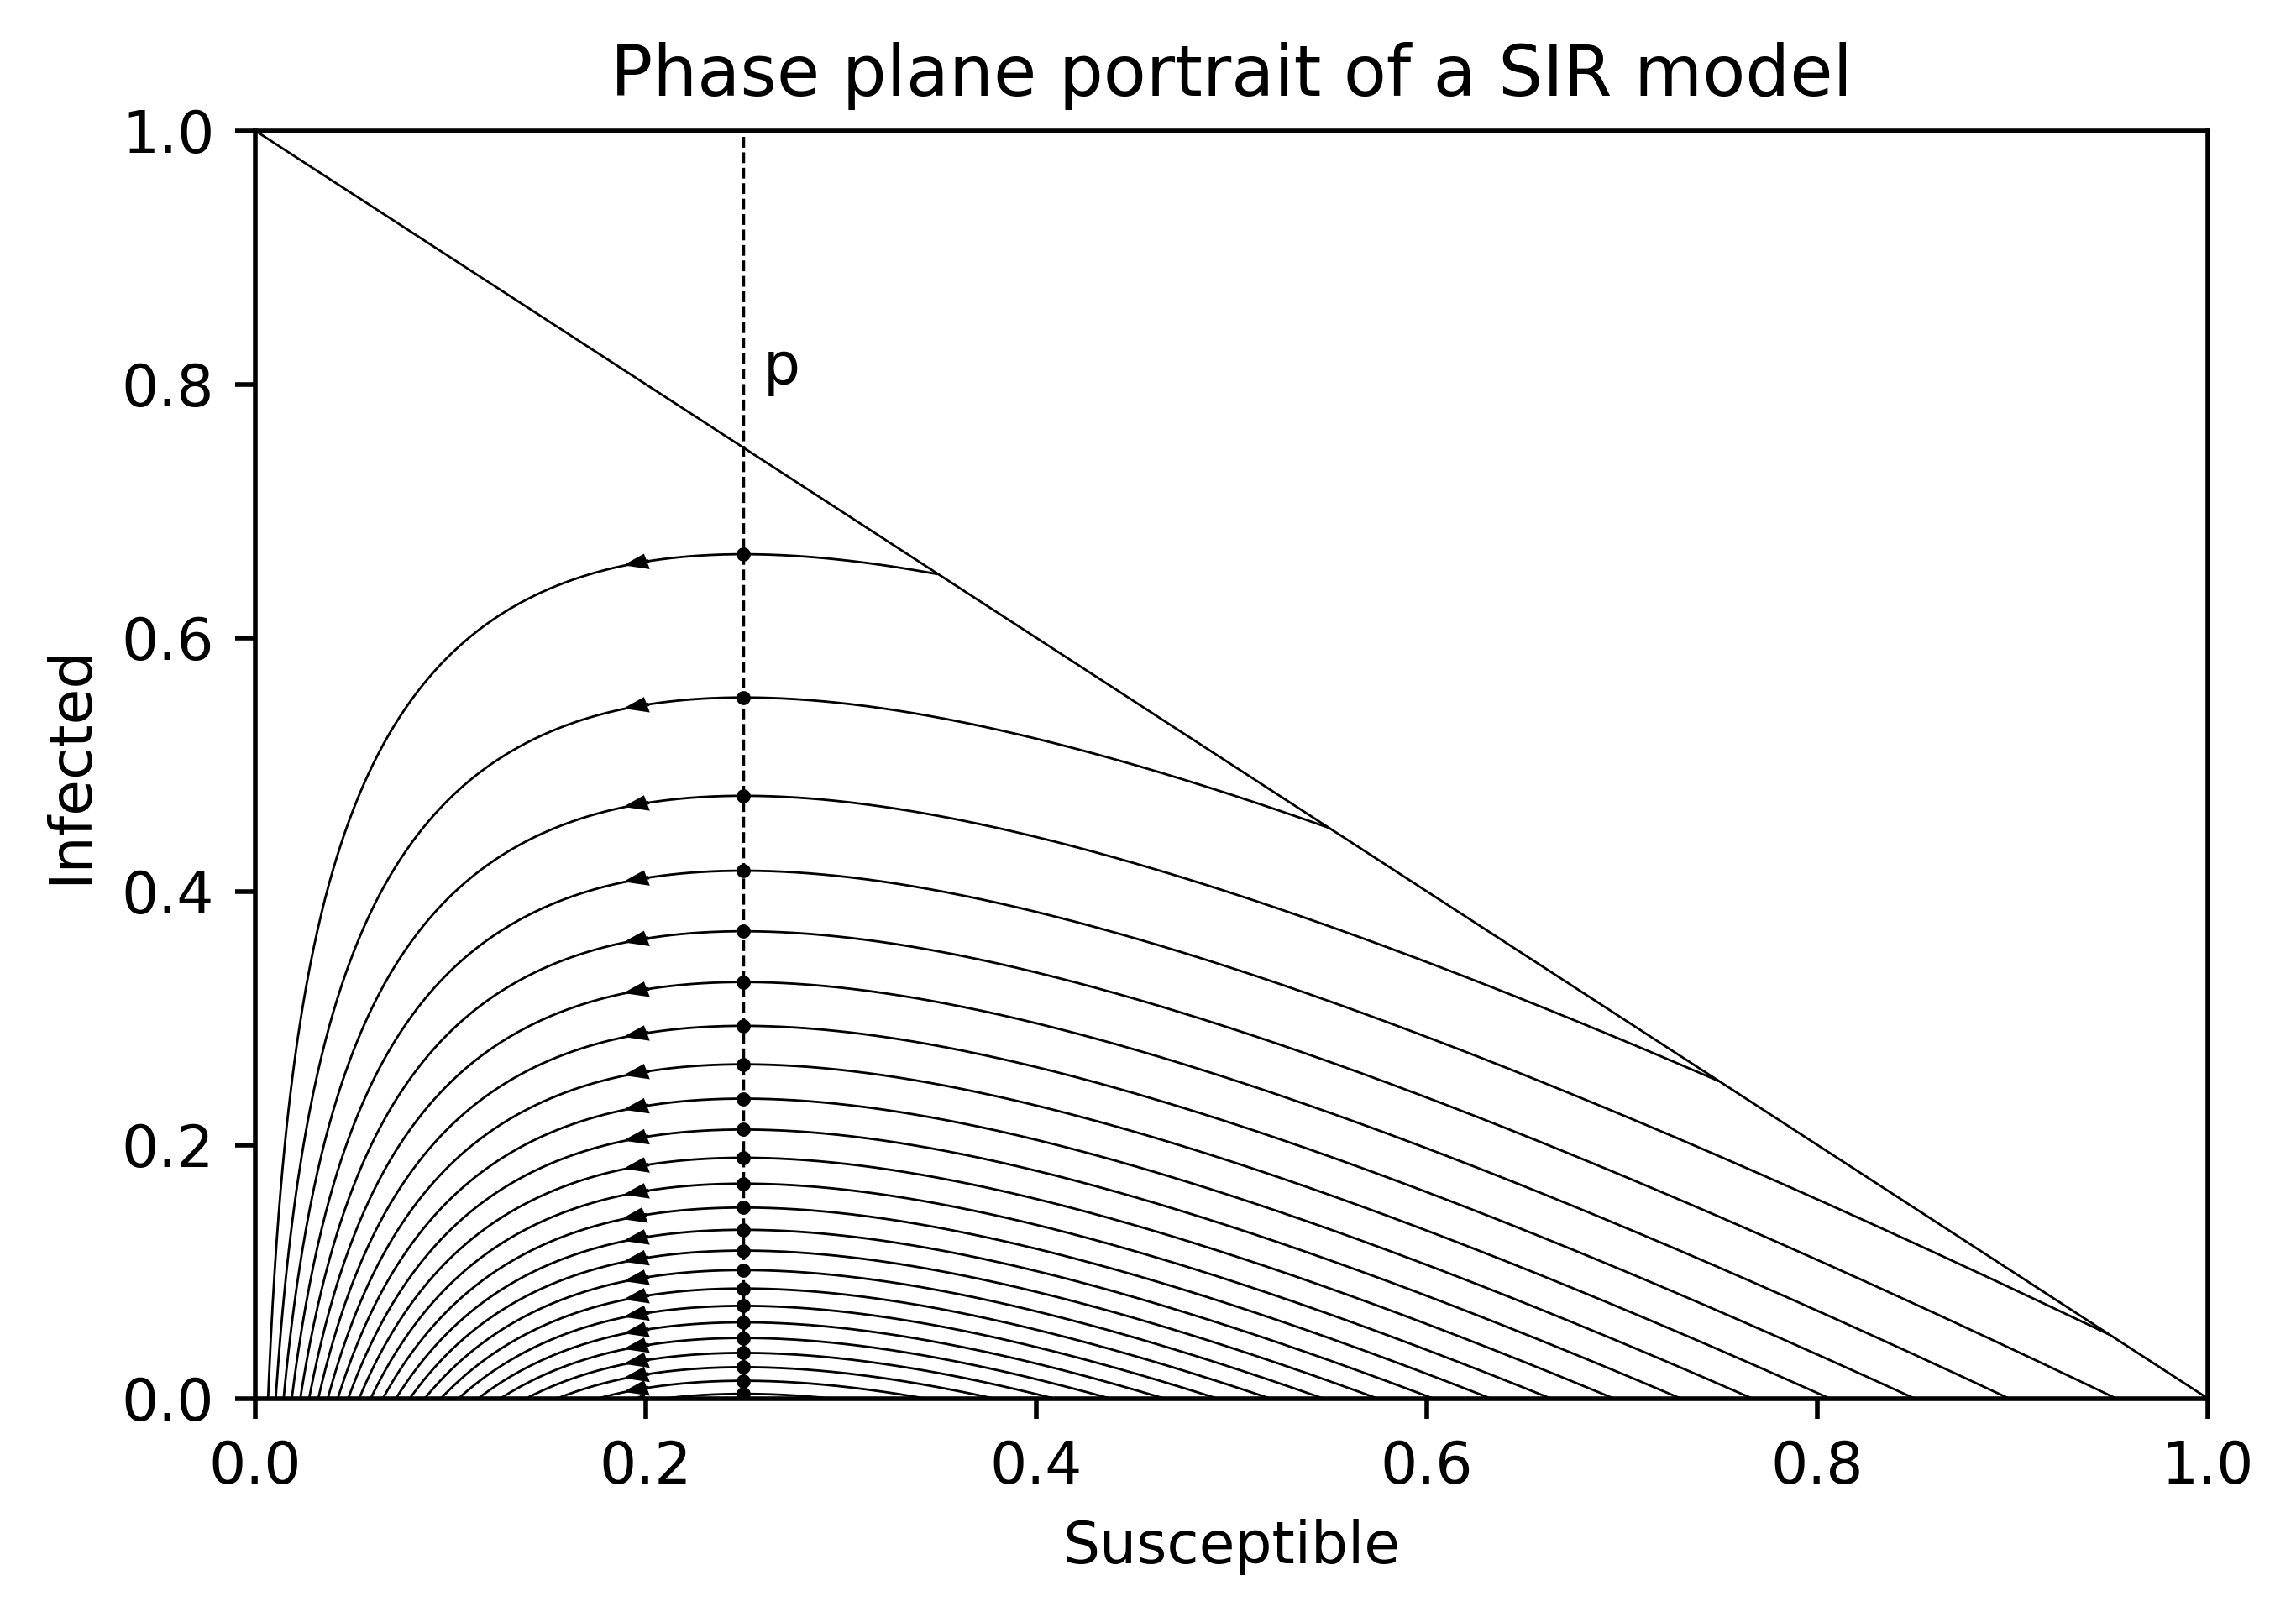

In [34]:
class phase_plane:
    def __init__(self, beta, gamma, n): # n = point density
        self.beta = beta
        self.gamma = gamma
        self.rho = self.gamma / self.beta
        self.n = n
        self.fig, (self.ax) = plt.subplots(1, 1, dpi=500)

    def get_trajectory(self, x0):
        s0, i0 = x0
        rho = self.rho
        c = i0 + s0 - rho * np.log(s0)
        s = np.arange(1/self.n, s0, 1/self.n)
        i = -s + rho * np.log(s) + c
        imax = 1 - rho + rho * np.log(rho/s0)
        return s, i, imax
    
    def draw_trajectory(self, x0, arrow_aim):
        s, i, imax = self.get_trajectory(x0)
        self.ax.plot(s, i, 'k-', linewidth=0.4) # trajectory
        self.ax.scatter(self.rho, imax, color='k', s=2) # marker for imax
        n = int((s[-1]*self.n) * (arrow_aim / s[-1])) # start-index for arrow at position s = arrow_aim
        self.ax.arrow(s[n], i[n], s[n-1]-s[n], i[n-1]-i[n], head_width=0.01, head_length=0.01, color='k', linewidth=0.4) # direction (head is one smaller because we move from 1 to 0 in s direction)
        return False if imax > 0 else True # stop drawing new trajectories
        

    def draw_phase_plane(self):
        self.ax.set_title('Phase plane portrait of a SIR model')
        self.ax.set_xlabel('Susceptible')
        self.ax.set_ylabel('Infected')
        self.ax.set_xlim(0,1)
        self.ax.set_ylim(0,1)
        x = np.linspace(0,1)
        y = np.array([-i+1 for i in x])
        rho = self.rho
        arrow_aim = rho - 0.05 # value on s_axis to start arrow
        i_start = rho + 0.1 # i0 of first trajectory
        self.ax.plot(x,y, 'k-', linewidth=0.4) # diagonal N0 line
        self.ax.plot([rho,rho], [0,1], 'k--', linewidth=0.5) # threshold
        self.ax.text(rho+0.01, 0.8, 'p')

        c = 0
        while True:
            n = c/5 + i_start
            x0 = (n, 1-n)
            stop = self.draw_trajectory(x0, arrow_aim)
            if stop: break
            c += 1
        plt.show()

plotter = phase_plane(2, 0.5, 1000).draw_phase_plane()